In [12]:
import numpy as np # linear algebra
import matplotlib
import matplotlib.pyplot as plt
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame

In [13]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

In [14]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [15]:
## training and test datasets

#data_train = pd.read_csv('/home/kanhaiya/neural_network_biology/train_ann_term.csv')
#data_test = pd.read_csv('/home/kanhaiya/neural_network_biology/test_ann_term.csv')
data_train = pd.read_csv('../train_ann_term.csv')
data_test = pd.read_csv('../test_ann_term.csv')

In [16]:
print(data_train)

       class  lepton_pT  lepton_eta  lepton_phi  missing_energy_magnitude  \
0          1   0.907542    0.329147    0.359412                  1.497970   
1          1   0.798835    1.470639   -1.635975                  0.453773   
2          0   1.344385   -0.876626    0.935913                  1.992050   
3          0   1.595839   -0.607811    0.007075                  1.818450   
4          1   0.409391   -1.884684   -1.027292                  1.672452   
...      ...        ...         ...         ...                       ...   
68631      0   0.631747   -1.732745    0.734498                  0.647226   
68632      0   0.967752   -0.317568   -1.579379                  0.512029   
68633      1   0.908091   -0.825006   -0.830871                  0.736298   
68634      0   0.903699    0.261943   -0.429149                  1.892855   
68635      0   0.566047   -0.317568    0.062561                  0.358186   

       missing_energy_phi    jet1pt   jet1eta   jet1phi  jet1b.tag  ...  \


In [17]:
feature_names = data_train.columns[1:-1]  # we skip the first and last column

In [18]:
# initialize the model parameters

variables = data_train.columns[1:-1]  # we skip the first and last column
target_training = None
discriminator_history = None
sample_training = None
sample_validation = None
        

seed = 193 #generates a random number
discriminator_nodes =  16 # 20
discriminator_layers = 1
discriminator_epochs = 50
validation_fraction = 0.4
discriminator_dropout =  0.4
        
batchSize = 128 # 512
discriminator_optimizer = SGD(lr =0.01)
discriminator_history_array = []

neural_network_input_dimension = variables.shape


weight_train = np.reshape([random.random()/10 for i in range(len(data_train))], (len(data_train), 1))
weight_test = np.reshape([random.random()/10 for i in range(len(data_test))], (len(data_test), 1))
target_training = data_train["class"]
target_validation = data_test["class"]
sample_training = data_train[feature_names]
sample_validation = data_test[feature_names]
        
# Scaling the sample data 
scaler = StandardScaler()
sample_training_scaled = scaler.fit_transform(sample_training)
sample_validation_scaled = scaler.fit_transform(sample_validation)

# Making the table of the data using DataFrame

sample_training_scaled = DataFrame(sample_training_scaled)
sample_validation_scaled = DataFrame(sample_validation_scaled)

        # Renaming the name of the columns after scaling 
sample_training_scaled.columns = sample_training.columns
sample_validation_scaled.columns = sample_validation.columns
        
# Including the target training and validation output by adding one more column

sample_training_scaled['target_training'] = target_training
sample_validation_scaled['target_validation'] = target_validation
        
#print(sample_training_scaled)  # to see the data

In [19]:
# Create the model 

network_input = Input( shape = (neural_network_input_dimension))
neural_network_layer = Dense(discriminator_nodes, activation = "elu", name="HiddenLayer")(network_input)
neural_network_layer = Dense(1, activation = "sigmoid")(neural_network_layer)
        
model = Model(inputs=network_input, outputs= neural_network_layer)
model.summary()
plot_model(model, to_file='neural_network_graph.pdf')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28)]              0         
_________________________________________________________________
HiddenLayer (Dense)          (None, 16)                464       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [20]:
# compile_model

model.compile(loss = "binary_crossentropy", weighted_metrics = [metrics.binary_accuracy], optimizer = "adam", metrics=['accuracy'])

In [21]:
# fit_model

discriminator_history = model.fit(sample_training, target_training.ravel(), epochs=discriminator_epochs, batch_size = batchSize, sample_weight = weight_train.ravel(), validation_data = (sample_validation, target_validation, weight_test.ravel()))
discriminator_history_array.append(discriminator_history)

Epoch 1/50
537/537 [==============================] - 7s 13ms/step - loss: 0.0358 - accuracy: 0.5411 - binary_accuracy: 0.5416 - val_loss: 0.0327 - val_accuracy: 0.6100 - val_binary_accuracy: 0.6090
Epoch 2/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0327 - accuracy: 0.6162 - binary_accuracy: 0.6168 - val_loss: 0.0323 - val_accuracy: 0.6242 - val_binary_accuracy: 0.6230
Epoch 3/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0320 - accuracy: 0.6212 - binary_accuracy: 0.6234 - val_loss: 0.0322 - val_accuracy: 0.6271 - val_binary_accuracy: 0.6251
Epoch 4/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0319 - accuracy: 0.6282 - binary_accuracy: 0.6303 - val_loss: 0.0320 - val_accuracy: 0.6324 - val_binary_accuracy: 0.6323
Epoch 5/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0319 - accuracy: 0.6348 - binary_accuracy: 0.6372 - val_loss: 0.0319 - val_accuracy: 0.6328 - val_binary_accuracy: 0.6339
Epoch 6/5

537/537 [==============================] - 3s 6ms/step - loss: 0.0302 - accuracy: 0.6730 - binary_accuracy: 0.6775 - val_loss: 0.0305 - val_accuracy: 0.6739 - val_binary_accuracy: 0.6721
Epoch 43/50
537/537 [==============================] - 3s 6ms/step - loss: 0.0302 - accuracy: 0.6773 - binary_accuracy: 0.6773 - val_loss: 0.0306 - val_accuracy: 0.6632 - val_binary_accuracy: 0.6626
Epoch 44/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0304 - accuracy: 0.6710 - binary_accuracy: 0.6720 - val_loss: 0.0304 - val_accuracy: 0.6739 - val_binary_accuracy: 0.6728
Epoch 45/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0302 - accuracy: 0.6722 - binary_accuracy: 0.6733 - val_loss: 0.0304 - val_accuracy: 0.6660 - val_binary_accuracy: 0.6662
Epoch 46/50
537/537 [==============================] - 3s 5ms/step - loss: 0.0302 - accuracy: 0.6773 - binary_accuracy: 0.6801 - val_loss: 0.0303 - val_accuracy: 0.6736 - val_binary_accuracy: 0.6730
Epoch 47/50
537/5

### Prediction is the output of an algorithm after it has been trained on a historical dataset and applied to new data when forecasting the likelihood of a particular outcomes. It allows to make highly accurate guesses as to the likely outcomes of a question based on historical data. 

In [22]:
# predict_model

model_prediction = model.predict(sample_validation).ravel()
model_val_prediction = model.predict(sample_training).ravel()


fpr, tpr, threshold = roc_curve(target_validation, model_prediction)
fpr_2, tpr_2, threshold_2 = roc_curve(target_training, model_val_prediction)
auc_1 = auc(fpr, tpr)
auc_2 = auc(fpr_2, tpr_2)

### Loss is a number indicating how bad was a single example. We need loss function to measure how good our prediction model does in terms of being able to predict the expected outcome (or value). If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater. 

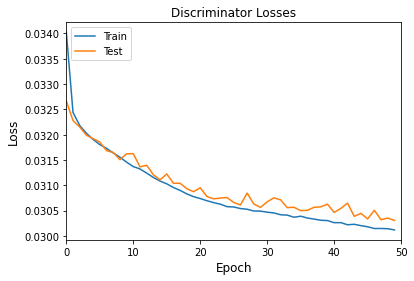

In [23]:
# plotLosses

plt.plot(discriminator_history.history['loss'])
plt.plot(discriminator_history.history['val_loss'])
plt.title('Discriminator Losses',fontsize='large')
plt.ylabel('Loss',fontsize='large')
plt.xlabel('Epoch',fontsize='large')
plt.xlim(0,discriminator_epochs)
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('losses.pdf')

### A true positive is an outcome where the model correctly predicts the positive class. Similarly, a true negative is an outcome where the model correctly predicts the negative class.

### A false positive is an outcome where the model incorrectly predicts the positive class. And a false negative is an outcome where the model incorrectly predicts the negative class.

### Let's make the following definitions:

### "Wolf" is a positive class.
### "No wolf" is a negative class.
### We can summarize our "wolf-prediction" model using a 2x2 confusion matrix that depicts all four possible outcomes:
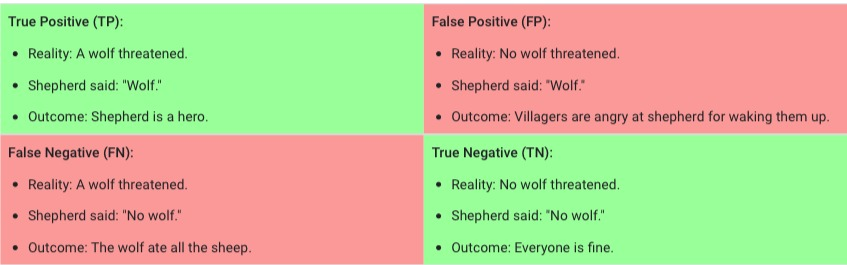

### ROC curve, also known as Reciever Operating Characteristics Curve, is a metric used to measure the performance of a classifier model. The ROC curve depicts the rate of true posititves with respect to the rate of false positives, therefore hifglighting the sensivity of the classifier model.

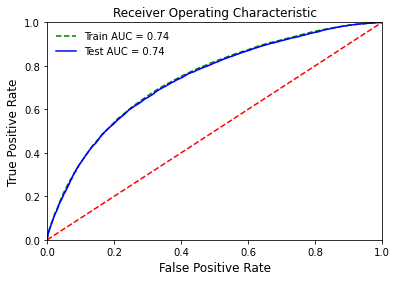

In [24]:
# plotRoc

plt.title('Receiver Operating Characteristic',fontsize='large')
plt.plot(fpr_2, tpr_2, 'g--', label='Train AUC = %0.2f'% auc_2)
plt.plot(fpr, tpr, 'b', label='Test AUC = %0.2f'% auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.,1.])
plt.ylim([-0.,1.])
plt.ylabel('True Positive Rate', fontsize='large')
plt.xlabel('False Positive Rate', fontsize='large')
plt.legend(frameon=False)
plt.savefig('roc.pdf')

### Accuracy is the number of true posititves and true negatives divided by the number of true posititves, true negatives, false positives, and false negatives. The accuracy tells that overall how often the model is making a correct prediction.

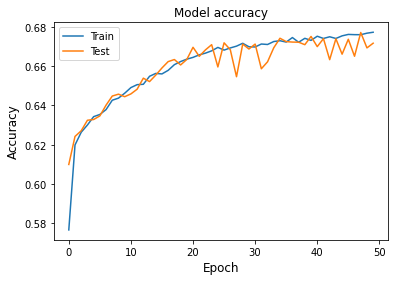

In [25]:
# plotAccuracy

plt.plot(discriminator_history.history['accuracy'])
plt.plot(discriminator_history.history['val_accuracy'])
plt.title('Model accuracy',fontsize='large')
plt.ylabel('Accuracy',fontsize='large')
plt.xlabel('Epoch',fontsize='large')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('acc.pdf')

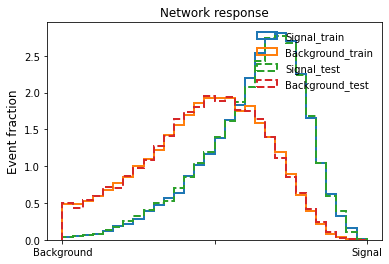

<Figure size 432x288 with 0 Axes>

In [26]:
# plotSeparation

signal_histo = []
background_histo = []
signal_histo_train = []
background_histo_train = []
for i in range(len(sample_validation)):
    if target_validation[i] == 1:
        signal_histo.append(model_prediction[i])
    if target_validation[i] == 0:
        background_histo.append(model_prediction[i])
for i in range(len(sample_training)):
    if target_training[i] == 1:
        signal_histo_train.append(model_val_prediction[i])
    if target_training[i] == 0:
        background_histo_train.append(model_val_prediction[i])
        
plt.hist(signal_histo_train, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, label = "Signal_train")
plt.hist(background_histo_train, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, label = "Background_train")
plt.hist(signal_histo, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, linestyle='dashed',  label = "Signal_test")
plt.hist(background_histo, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, linestyle='dashed', label = "Background_test")
        
plt.legend()
plt.title('Network response',fontsize='large')
plt.xticks([0.0,0.5,1.0],["Background","","Signal"],rotation=0)
# plt.xlabel('Network response', horizontalalignment='left', fontsize='large')
plt.ylabel('Event fraction', fontsize='large')
plt.legend(frameon=False)
plt.show()
plt.savefig('separation_discriminator.pdf')